<a href="https://colab.research.google.com/github/yushendye/AerialInspection/blob/main/PP_YOLO_Train_9_July.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!python -m pip install paddlepaddle-gpu==2.1.0.post101 -f https://paddlepaddle.org.cn/whl/mkl/stable.html
!python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 108.9MB 55kB/s 


In [2]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 CPU.
PaddlePaddle works well on 2 CPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [3]:
!python -c "import paddle; print(paddle.__version__)"

2.1.1


In [4]:
!pip install paddledet==2.1.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 419kB 214kB/s 
     |████████████████████████████████| 1.5MB 2.5MB/s 
     |████████████████████████████████| 2.7MB 11.2MB/s 
     |████████████████████████████████| 153kB 29.3MB/s 
     |████████████████████████████████| 2.0MB 20.9MB/s 
     |████████████████████████████████| 204kB 17.6MB/s 
     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 194kB 21.3MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 1.9MB 7.3MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 102kB 6.3MB/s 
     |████████████████████████████████| 7.2MB 13.9MB/s 
     |████████████████████████████████| 102kB 7.5MB/s 
     |████████████████████████████████| 348kB 13.1MB/s 
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux

In [5]:
!git clone https://github.com/PaddlePaddle/PaddleDetection.git

Cloning into 'PaddleDetection'...
remote: Enumerating objects: 14971, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 14971 (delta 96), reused 112 (delta 66), pack-reused 14761
Receiving objects: 100% (14971/14971), 133.76 MiB | 35.62 MiB/s, done.
Resolving deltas: 100% (10749/10749), done.


In [6]:
%cd /content/PaddleDetection

/content/PaddleDetection


In [7]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating paddledet.egg-info
writing paddledet.egg-info/PKG-INFO
writing dependency_links to paddledet.egg-info/dependency_links.txt
writing requirements to paddledet.egg-info/requires.txt
writing top-level names to paddledet.egg-info/top_level.txt
writing manifest file 'paddledet.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'paddledet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ppdet
copying ppdet/__init__.py -> build/lib/ppdet
copying ppdet/optimizer.py -> build/lib/ppdet
creating build/lib/ppdet/core
copying ppdet/core/__init__.py -> build/lib/ppdet/core
copying ppdet/core/workspace.py -> build/lib/ppdet/core
creating build/lib/ppdet/data
copying ppdet/data/__init__.py -> build/lib/ppdet/data
copying ppdet/data/shm_utils.py -> build/lib/ppdet/data
copying ppdet/data/reader.py -> buil

In [8]:
!pip install -r requirements.txt

In [9]:
!cp -r /content/drive/MyDrive/COCO_annotations /content/

In [10]:
%cd /content/
!cp /content/drive/MyDrive/updated_data.zip /content/
!unzip /content/updated_data.zip

/content
Archive:  /content/updated_data.zip
   creating: content/data/
  inflating: content/data/train.txt  
   creating: content/data/obj/
  inflating: content/data/obj/COCO_train2014_000000303133.jpg  
  inflating: content/data/obj/COCO_train2014_000000475763.jpg  
  inflating: content/data/obj/COCO_train2014_000000115342.txt  
  inflating: content/data/obj/COCO_train2014_000000114732.jpg  
  inflating: content/data/obj/COCO_train2014_000000565444.jpg  
  inflating: content/data/obj/COCO_train2014_000000483956.txt  
  inflating: content/data/obj/COCO_train2014_000000524881.txt  
  inflating: content/data/obj/COCO_train2014_000000106799.txt  
  inflating: content/data/obj/COCO_train2014_000000057663.jpg  
  inflating: content/data/obj/COCO_train2014_000000049801.jpg  
  inflating: content/data/obj/COCO_train2014_000000131245.txt  
  inflating: content/data/obj/COCO_train2014_000000385448.txt  
  inflating: content/data/obj/COCO_train2014_000000541327.txt  
  inflating: content/data/o

In [11]:
!mkdir /content/labels/
!mv /content/content/data/obj/*.txt /content/labels

In [ ]:
!python /content/PaddleDetection/tools/train.py -c /content/PaddleDetection/configs/ppyolo/ppyolo_r50vd_dcn_2x_coco.yml -o use_gpu=true

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
W0709 09:40:00.549998   529 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.2, Runtime API Version: 10.1
W0709 09:40:00.567147   529 device_context.cc:422] device: 0, cuDNN Version: 7.6.
[07/09 09:40:06] ppdet.utils.checkpoint INFO: yolo_head.yolo_output.0.weight not used, shape [258, 1024, 1, 1] unmatched with [36, 1024, 1, 1] in model.
[07/09 09:40:06] ppdet.utils.checkpoint

In [12]:
%cd /content/PaddleDetection/

/content/PaddleDetection


In [34]:
#!python /content/PaddleDetection/tools/infer.py -c /content/PaddleDetection/configs/ppyolo/ppyolo_r50vd_dcn_2x_coco.yml --infer_img /content/drive/MyDrive/umbrella/COCO_train2014_000000041008.jpg -o -o weights=/content/drive/MyDrive/9_July/ppyolo_r50vd_dcn_2x_coco/79.pdparams --draw_threshold=0.2 -o use_gpu=false
!python tools/infer.py -c /content/PaddleDetection/configs/ppyolo/ppyolo_r50vd_dcn_2x_coco.yml --infer_img=/content/drive/MyDrive/umbrella/COCO_train2014_000000041008.jpg -o weights=/content/drive/MyDrive/9_July/ppyolo_r50vd_dcn_2x_coco/79.pdparams use_gpu=false --draw_threshold=0.1

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
[07/09 14:32:18] ppdet.utils.checkpoint INFO: Finish loading model weights: /content/drive/MyDrive/9_July/ppyolo_r50vd_dcn_2x_coco/79.pdparams
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!

import numpy as np
from paddle.io import DataLoader, Dataset

class RandomDataset(Dataset):
    def __getitem__(self, idx):
        data = np.random.random((2, 3)).astype('float32')

        return data

    def __len__(self):
        return 10

dataset = RandomDataset()
loader = DataL

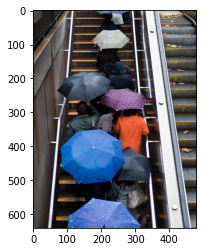

In [35]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('./output/COCO_train2014_000000041008.jpg'))